In [1]:
%matplotlib inline

In [2]:
import sys
sys.stdout = open(1, 'w')


# Color Quantization using K-Means


Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 8 (or 64), while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to
find 64 color clusters. In the image processing literature, the codebook
obtained from K-means (the cluster centers) is called the color palette. Using
a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.

For comparison, a quantized image using a random codebook (colors picked up
randomly) is also shown.



In [3]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>

#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [4]:
#n_colors = 1024
#n_colors = 64
n_colors = 8

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [5]:
print ("Color Quantization using K-Means Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace (China), reducing the number of colors required to show the image from 96,615 unique colors to 8 (or 64), while preserving the overall appearance quality. In this example, pixels are represented in a 3D-space and K-means is used to find 64 color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette. For comparison, a quantized image using a random codebook (colors picked up randomly) is also shown.")

In [6]:
print("Training kmeans clustering model using Stock Python ... ")
print("The results are as bel ... ")

In [7]:
#print("Fitting model on a small sub-sample of the data")
print("Fitting model on the data")
t0 = time()
#image_array_sample = shuffle(image_array, random_state=0)[:1000]
#image_array_sample = shuffle(image_array, random_state=0)
# With Intel-optimized scikit-learn we can do the full image even on a laptop!
image_array_sample = image_array
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
# TODO add call to kmeans predict
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

In [8]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

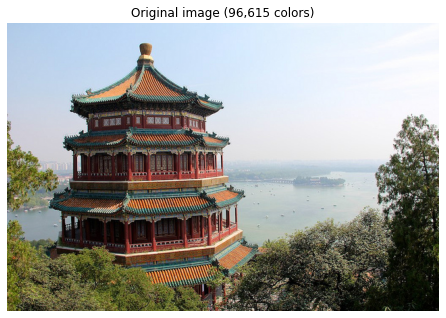

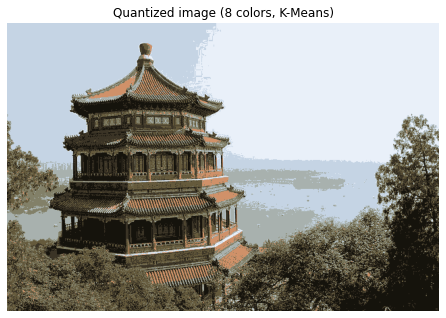

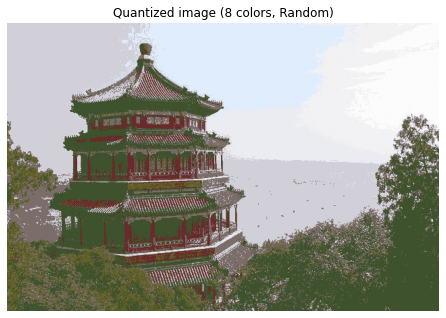

In [9]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
#plt.title('Quantized image (64 colors, K-Means)')
plt.title('Quantized image (%i colors, K-Means)'%n_colors)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
#plt.title('Quantized image (64 colors, Random)')
plt.title('Quantized image (%i colors, Random)'%n_colors)
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Let's look at speedups through Intel-DAAL-optimizations in scikit-learn

In [10]:
from platform import python_version
print ("Python Version - ")
python_version()

'3.8.8'

In [14]:
%%javascript
var kernel = Jupyter.notebook.kernel
print('kernel_name = ' + '"' + kernel.name + '"')

<IPython.core.display.Javascript object>

In [15]:
print(kernel_name)

NameError: name 'kernel_name' is not defined

In [19]:
#from sklearn.daal4sklearn import dispatcher
from sklearnex import patch_sklearn
patch_sklearn()
# TODO: Disable Intel-optimizations (DAAL) and repeat fit and predict and get timings
# call disable() on dispatcher before calling KMeans
#dispatcher.disable()


Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


## Now let's do a detailed performance analysis

Use provided alias from amplxe.ipy to run VTune/amplifier.

In [ ]:
%pycat amplxe.ipy
%run amplxe.ipy

In [ ]:
# save code (select the right cells!)
%save -f runme.py 2 3 4 

In [ ]:
# collect data
%amplxe runme.py